In [ ]:
from jabutiles.tile import Tile
from jabutiles.mask import Mask
from jabutiles.layer import Layer
from jabutiles.shade import Shade
from jabutiles.maskgen import MaskGen, ShapeMaskGen
from jabutiles.texture import Texture, TextureGen
from jabutiles.utils_img import display_image

SCALE = 8

# Stone Path on Grass

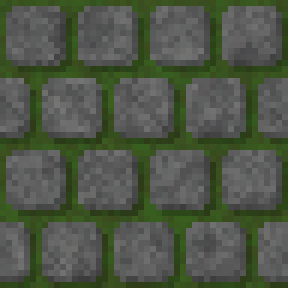

In [21]:
SIZE = 48

tx1 = TextureGen.named_texture(SIZE, "grass")
tx2 = TextureGen.named_texture(SIZE, "gravel")

mk1 = MaskGen.brick_pattern(SIZE, 10, 2, 1).offset(-1, "wrap")

sh1 = Shade(0.8, -1, "wrap", inverted=True)
sh2 = Shade(0.8, 1, "wrap")

tl1 = Tile([
    Layer(tx1),
    Layer(tx2, mk1, sh1, sh2)
])
display_image(tl1.image, SCALE)

# Plank Bridge over Water

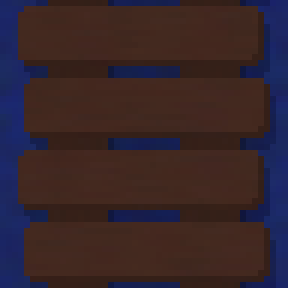

In [22]:
SIZE = (48, 48)

tx1 = TextureGen.named_texture(SIZE, "water")
tx2 = TextureGen.named_texture(SIZE, "wood")

mk1 = MaskGen.line_draw(SIZE, [((12.5, 0), (12.5, 48), 10)])
mk1 = mk1.merge(mk1.reflect('y'))
mk2 = MaskGen.brick_pattern(SIZE, (41, 10), (5, 2), 1, 1).offset((-2, -1))

sh1 = Shade(0.8, (+1, +2), "wrap")
sh2 = Shade(0.8, (-1, -1), "wrap", inverted=True)

tl1 = Tile([
    Layer(tx1),
    Layer(tx2, mk1, None, sh1),
    Layer(tx2.rotate(90), mk2, sh2, sh1),
])
display_image(tl1.image, SCALE)

# Clay Bricks and Mortar

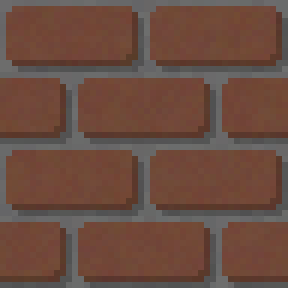

In [23]:
SIZE = 48

tx1 = TextureGen.named_texture(SIZE, "stone")
tx2 = TextureGen.named_texture(SIZE, "clay")

mk1 = MaskGen.brick_pattern(SIZE, (22, 10), 2, 1).offset(-1, "wrap")

sh1 = Shade(0.8, (-1, -1), "wrap", inverted=True)
sh2 = Shade(0.8, (+1, +1), "wrap")

tl1 = Tile([
    Layer(tx1),
    Layer(tx2, mk1, sh1, sh2),
])
display_image(tl1.image, SCALE)

# 

# Logo

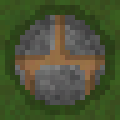

In [29]:
S = 24
SIZE = (S, S)
SCALE = 8
FORCE = 1.25

tx1 = TextureGen.named_texture(SIZE, "dirt")
tx2 = TextureGen.named_texture(SIZE, "gravel")
tx3 = TextureGen.named_texture(SIZE, "grass")
tx4 = TextureGen.named_texture(SIZE, "water.shallow")

mk1 = MaskGen.brick_pattern(SIZE, (10, 10), 2, 1).offset((-1, -1), "wrap")
mk2 = MaskGen.blob_draw(SIZE, [((S/2-0.5, S/2-0.5), S/2-3.5)]).invert()
mk3 = ShapeMaskGen.hexagonal(SIZE)

sh1 = Shade(FORCE, (-1, +1), "wrap", inverted=True)
sh2 = Shade(1/FORCE, (-1, +1), "wrap")
sh3 = Shade(1/FORCE, outline=2)
sh4 = Shade(1/FORCE, outline=2, dist=0.5, inverted=True)

tl1 = Tile([
    Layer(tx1),
    Layer(tx2, mk1, sh1, sh2),
    Layer(tx3, mk2, sh4, sh3),
])
display_image(tl1.image, 5)

In [ ]:
tl1.image.save("./examples/logo.png")
Texture(tl1.image).scale(8).save("./examples/logox8.png")

Using cached image
Using cached image


In [ ]:

tl1.set_shape(mk3)
display_image(tl1.image, 5)

tl1.set_base(tx4)
display_image(tl1.image, 5)